In [16]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

In [3]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [52]:
query = """
select *
from checker
where uid like 'user_%'
"""

ch = pd.read_sql_query(query, conn, parse_dates=['timestamp'])
ch['hour'] = ch['timestamp'].dt.hour
ch['date'] = ch['timestamp'].dt.date
ch['weekday'] = ch['timestamp'].dt.weekday
ch['type'] = ch['weekday'].apply(lambda row: 'work' if row < 5 else 'weekend')

In [53]:
weekend_amount = ch[ch['type'] == 'weekend']
weekend_amount = weekend_amount['hour'].to_list()

In [67]:
workday_amount = ch[ch['type'] == 'work']
workday_amount = workday_amount['hour'].to_list()

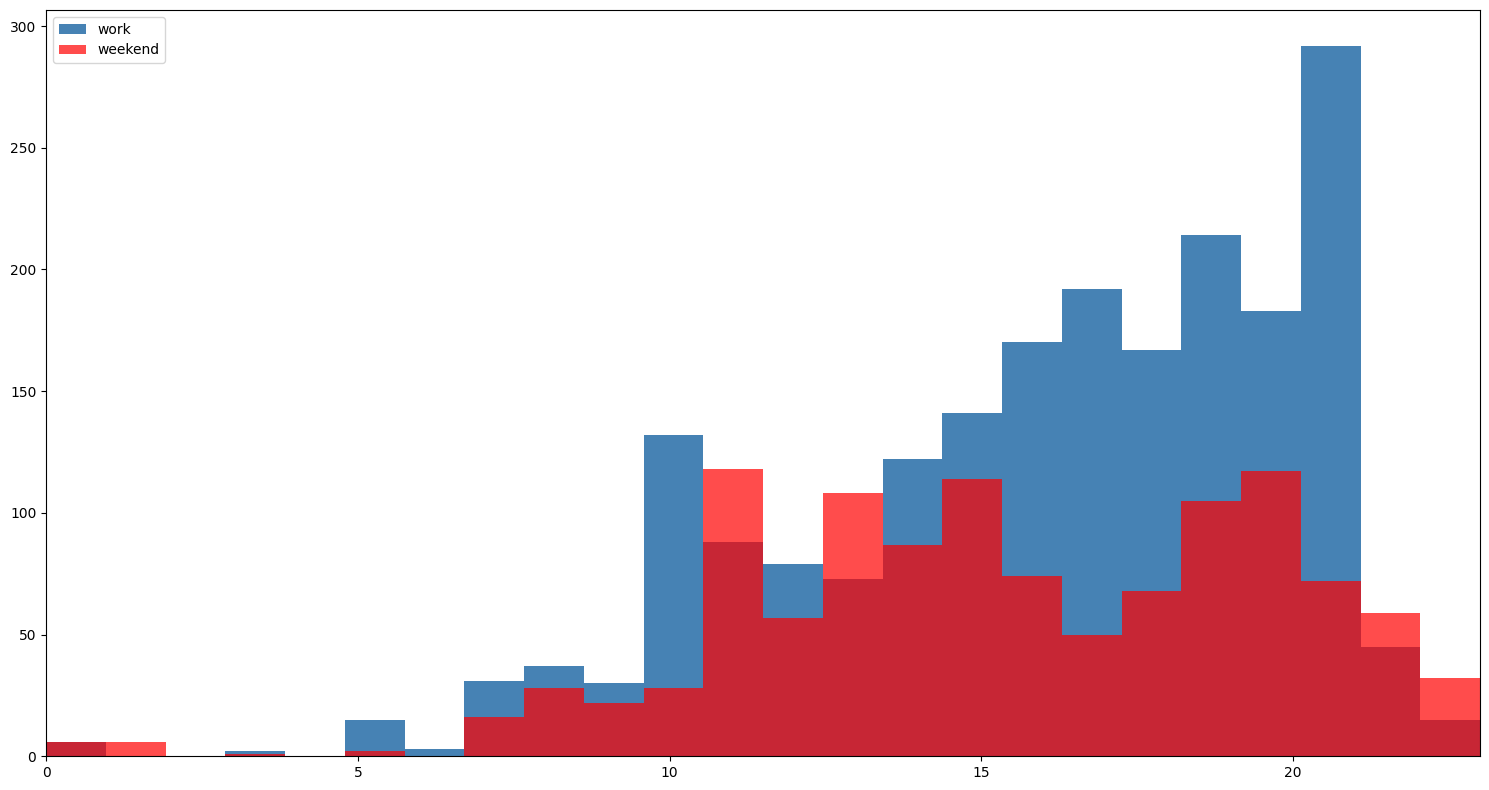

In [90]:
plt.figure(figsize=(15, 8))

plt.hist(
    workday_amount,
    bins=24,
    color='steelblue',
    label='work'
)

plt.hist(
    weekend_amount,
    bins=24,
    alpha=0.7,
    color='red',
    label='weekend',
)

plt.xlim(0, 23)
plt.legend(loc='upper left')
plt.tight_layout()